<a href="https://colab.research.google.com/github/86lekwenshiung/West-Nile-Virus-Prediction/blob/main/Project_4_West_Nile_Virus_Personal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction : West Nile Virus
___

**Problem Statement**

1. Given weather, location, testing, and spraying data, predict when and where different species of mosquitos will test positive for West Nile virus. 
2. Is pesticide effective : Population before 2011 vs Population After 2013.


**Key variables**

|Data|Description|
|---|---|
|Id|Id of the Mosquito|
|Species|Species of Mosquito|
|Address|Location of Trap|
|Block| Block nunber of address|
|Street| Street Name|
|Trap ID| Id of Trap. Letter behind Trap ID indicate it is near a main Trap|
|Latitude , Longtitude|Location of Trap , Mosquito|
|NumMosquito| No. of Mosquito|
|WNV_Present| 1 means WNV is present, and 0 means not present|
|Spray CSV| Latitude , Longtitude. Dataset only at 2011, 2013|

**Model Explored**

**workflow**
1. EDA
2. Feature Engineering 
3. Data Preprocessing
4. Modelling to predict WNV probability (without pesticide)
5. Select best Model to study the effect of pesticide
  * 5.1 Hypothesis : Pesticide has no effect on Mosquito population

**Key Insight**

We need to derive an effective plan to deploy pesticides throughout the city, and that is exactly where you come in!  


# 0.0 Libraries Import
___

In [ ]:
import pandas as pd
import numpy as np

# Machine Learning Libraries

# 1.0 Data Import
___

In [ ]:
!wget https://raw.githubusercontent.com/86lekwenshiung/West-Nile-Virus-Prediction/main/dataset/train.csv
!wget https://raw.githubusercontent.com/86lekwenshiung/West-Nile-Virus-Prediction/main/dataset/weather.csv
!wget https://raw.githubusercontent.com/86lekwenshiung/West-Nile-Virus-Prediction/main/dataset/test.csv
!wget https://raw.githubusercontent.com/86lekwenshiung/West-Nile-Virus-Prediction/main/dataset/spray.csv

--2021-10-14 12:25:12--  https://raw.githubusercontent.com/86lekwenshiung/West-Nile-Virus-Prediction/main/dataset/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1797335 (1.7M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]   1.71M  --.-KB/s    in 0.06s   

2021-10-14 12:25:12 (27.4 MB/s) - ‘train.csv’ saved [1797335/1797335]

--2021-10-14 12:25:12--  https://raw.githubusercontent.com/86lekwenshiung/West-Nile-Virus-Prediction/main/dataset/weather.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 2

In [ ]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')
df_spray = pd.read_csv('/content/spray.csv')
df_weather = pd.read_csv('/content/weather.csv')

# 2.0 EDA (Basic EDA)
___

In [ ]:
df_train.columns

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent'],
      dtype='object')

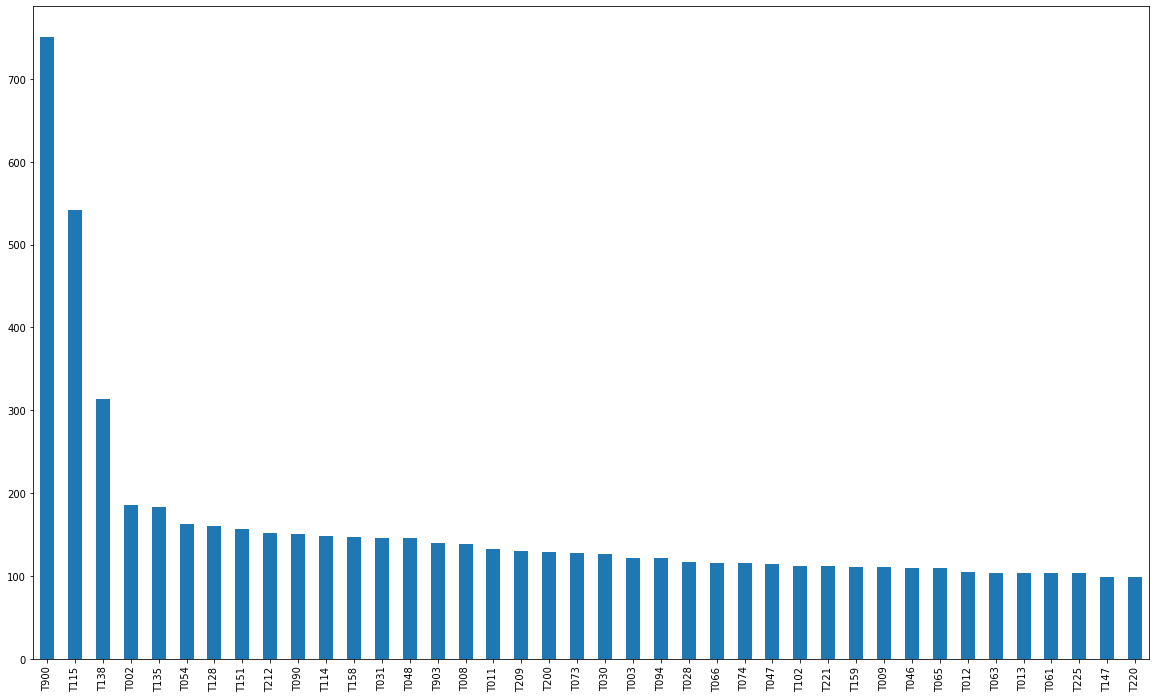

In [ ]:
df_train['Trap'].value_counts()[:40].plot(kind = 'bar' , figsize = (20,12))

### 2.1 Effect of Spray and Distance(Julian)
___

### 2.2 Weather EDA (Terence)
___